In [24]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns

# IMPORT CUSTOM LIBRARIES
from IN8_read_data import read_IN8scan, gen_data_df
from functions import *

# Monocrhomator flux experiment

## Data import

In [25]:
### IMPORT FLUX DATA ###
flux_folder = './data/ReactorFlux_data/'

files = {
        'PG': '030082_PG_good',
        'Cu200': '030092_311_good',
        'Si111': '030094_111_good',
        'Cu200': '030096_Cu_good',
        }

data = {}
for key in files.keys():
    data[key] = read_IN8scan(files[key], flux_folder)
    data[key]['data']['lambdaI'] = 2*np.pi/data[key]['data'].KI
    data[key]['data']['EI'] = 81.8/data[key]['data'].lambdaI**2

## **Monocrhomator Cu(200)**

Working in this configuration, by definition, we work at energy $E$ or wavelength $\lambda$. The other armonichs are therefore:
$$
\lambda , \hspace{0.5cm} \lambda/2, \hspace{0.5cm} \lambda/3 , \hspace{0.5cm} ...
$$
$$
E, \hspace{0.5cm} 4E, \hspace{0.5cm} 9E , \hspace{0.5cm} ...
$$

In [26]:
# Detectort efficiency
Eff_l = lambda l: l/np.sqrt(81.80)
Eff_E = lambda E: 1/np.sqrt(E)

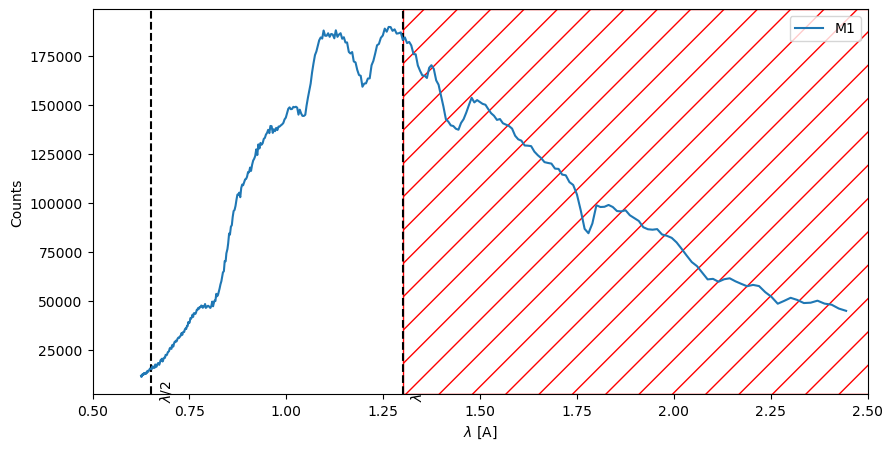

In [27]:
#lambda
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].lambdaI, Eff_l(data['Cu200']['data'].lambdaI)**-1*data['Cu200']['data'].M1, label='M1')

plt.xlabel('$\lambda$ [A]')
plt.ylabel('Counts')
plt.legend()
plt.xlim(.5, 2.5)

# vertical lines
lLim_Cu = 1.3
plt.axvline(lLim_Cu, color='k', linestyle='--')
plt.text(lLim_Cu+.02, 0, str('$\lambda$'), rotation=90)
plt.axvline(lLim_Cu/2, color='k', linestyle='--')
plt.text(lLim_Cu/2+.02, 0, str('$\lambda/2$'), rotation=90)

# red vertical area
plt.axvspan(lLim_Cu, 3, hatch='/', edgecolor="red", facecolor="none")

Lo stesso grafico lo possiamo rivedere in energia.

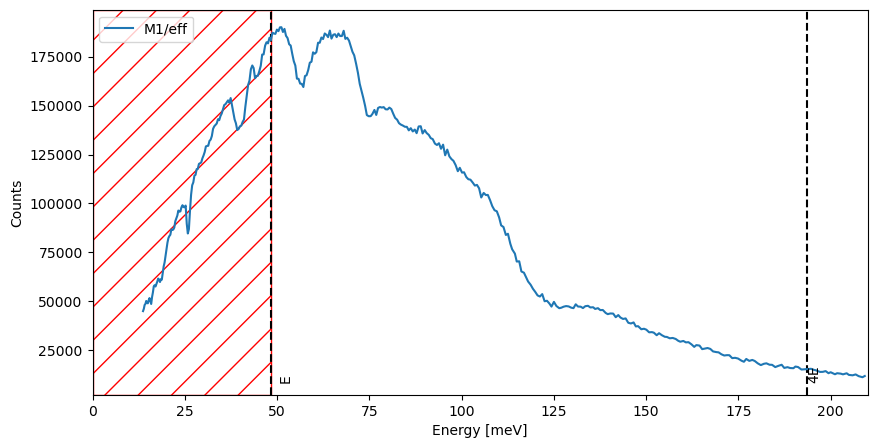

In [28]:
# Energy
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].EI, Eff_E(data['Cu200']['data'].EI)**-1*data['Cu200']['data'].M1, label='M1/eff')

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(0, 210)

# vertical lines
ELim_Cu = l2E(lLim_Cu)
plt.axvline(ELim_Cu, color='k', linestyle='--')
plt.text(ELim_Cu+2, 1e4, str('E'), rotation=90)
plt.axvline(ELim_Cu*4, color='k', linestyle='--')
plt.text(ELim_Cu*4, 1e4, str('4E'), rotation=90)

# red vertical area
plt.axvspan(0, ELim_Cu, hatch='/', edgecolor="red", facecolor="none")



## **Configuration: Cu(200) - Cu(400)**

$$
2\lambda , \hspace{0.5cm}  \lambda,\hspace{0.5cm} \frac{2}{3}\lambda, \hspace{0.5cm} ...
$$
$$
\frac{E}{4}, \hspace{0.5cm} E, \hspace{0.5cm} \frac{9}{4}E, \hspace{0.5cm} ...
$$

Ef = 69.7 meV
k_f = 5.799887979509778


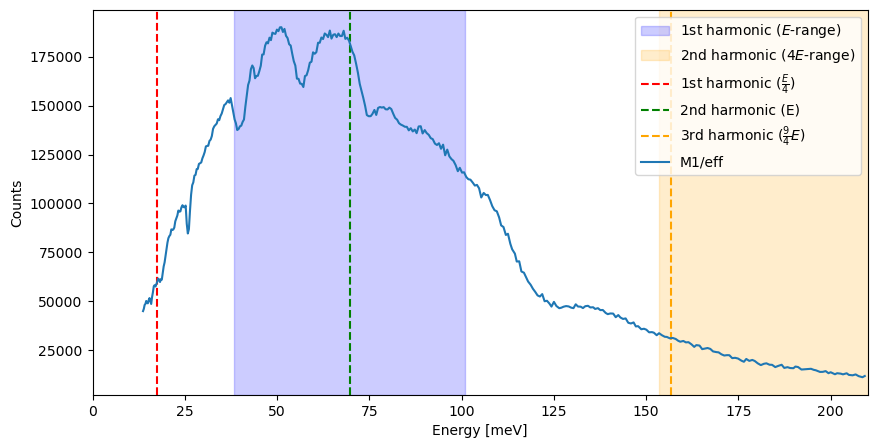

In [29]:
######################
Ef = 69.7
dE_range = 31.3
######################

print('Ef =', Ef, 'meV')
print('k_f =', E2k(Ef))

# Energy
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].EI, Eff_E(data['Cu200']['data'].EI)**-1*data['Cu200']['data'].M1, label='M1/eff')
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(0, 210)

# E-range
plt.axvspan(Ef-dE_range, Ef+dE_range, alpha=0.2, color='blue', label='1st harmonic ($E$-range)')
plt.axvspan((Ef-dE_range)*4, (Ef+dE_range)*4, alpha=0.2, color='orange', label=r'2nd harmonic ($4E$-range)')

# E analizer
plt.axvline(Ef/4, color='r', linestyle='--', label=r'1st harmonic ($\frac{E}{4}$)')
plt.axvline(Ef, color='g', linestyle='--', label=r'2nd harmonic (E)')
plt.axvline(Ef*9/4, color='orange', linestyle='--', label=r'3rd harmonic ($\frac{9}{4}E$)')

plt.legend()

Ef = 50 meV
k_f = 4.91233774341229


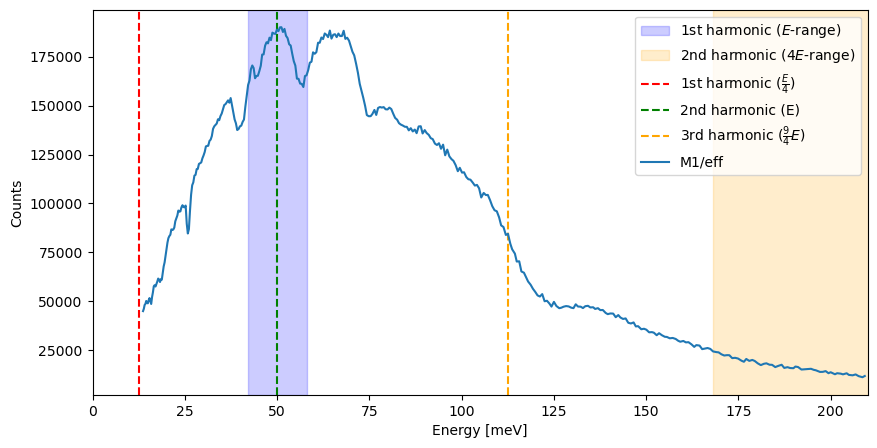

In [30]:
######################
Ef = 50
dE_range = 8
######################

print('Ef =', Ef, 'meV')
print('k_f =', E2k(Ef))

# Energy
plt.figure(figsize=(10, 5))
plt.errorbar(data['Cu200']['data'].EI, Eff_E(data['Cu200']['data'].EI)**-1*data['Cu200']['data'].M1, label='M1/eff')
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(0, 210)

# E-range
plt.axvspan(Ef-dE_range, Ef+dE_range, alpha=0.2, color='blue', label='1st harmonic ($E$-range)')
plt.axvspan((Ef-dE_range)*4, (Ef+dE_range)*4, alpha=0.2, color='orange', label=r'2nd harmonic ($4E$-range)')

# E analizer
plt.axvline(Ef/4, color='r', linestyle='--', label=r'1st harmonic ($\frac{E}{4}$)')
plt.axvline(Ef, color='g', linestyle='--', label=r'2nd harmonic (E)')
plt.axvline(Ef*9/4, color='orange', linestyle='--', label=r'3rd harmonic ($\frac{9}{4}E$)')

plt.legend()